In [1]:
# import dependecies
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
# import dependecies
import numpy as np
import pandas as pd

In [3]:
# import dependecies
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
# create engine to database
engine = create_engine("sqlite:///hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
# this transfers the contents of the data base into a different structure of data
Base = automap_base()

# reflect the tables
# this creates classes tha helop keep our code separate
Base.prepare(engine, reflect=True)



In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
# classes variables are typically capitalized to signigy a Class
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
# this is the "link" to the database; my understanding is that it basically "opens" the book and keeps the
# pages open for searching.
session = Session(engine)

# Exploratory Climate Analysis

<AxesSubplot:title={'center':'Total precipitatoin per day'}, xlabel='date', ylabel='Total precip per day (inches)'>

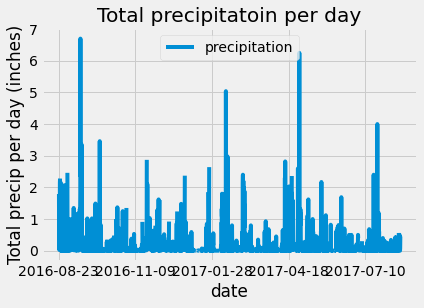

In [25]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 
from turtle import title


prev_year = dt.date(2017, 8, 23)

# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
#   create a variable to store results of query
results = []
#   query a SQLite database in python
# the .all() extracts all of the results from the query and puts them in a list
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >=prev_year).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date','precipitation'])

# Sort the dataframe by date
df.set_index(df['date'], inplace=True)
df = df.sort_index()

#  with index
# df

# without index
# print(df.to_string(index=False))

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(title="Total precipitatoin per day", ylabel = "Total precip per day (inches)")

In [26]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [27]:
# How many stations are available in this dataset?
# .all() here returns the results as a list
session.query(func.count(Station.station)).all()

[(9,)]

In [28]:
# What are the most active stations?
# List the stations and the counts in descending order.
session.query(Measurement.station,func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [31]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
# session.query(Station.station).all()
session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

Text(0.5, -1.340000000000014, 'Temperature (°F)')

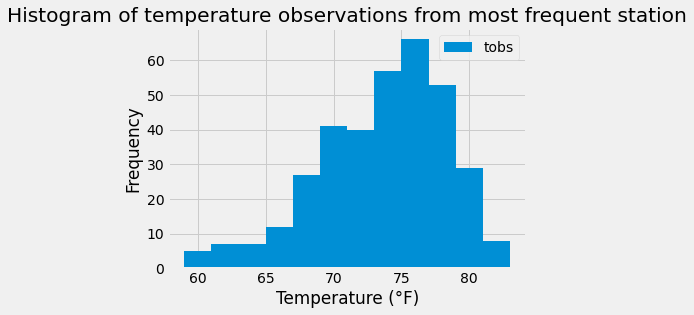

In [39]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

results = session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= prev_year).all()

df = pd.DataFrame(results, columns=['tobs'])
# print(df)

df.plot.hist(bins=12)
plt.tight_layout()
plt.title('Histogram of temperature observations from most frequent station')
plt.xlabel('Temperature (°F)')

In [ ]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates


# Challenge